Importing the libraries and dataset

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Position_Salaries.csv')
x = df.iloc[:, 1:2].values
y = df.iloc[:, -1].values

In [46]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [47]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [48]:
y = y.reshape(len(y), 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
x = scx.fit_transform(x)
y = scy.fit_transform(y)

In [50]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [51]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

Training the SVR model on the whole dataset

In [52]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting a new result

In [53]:
scy.inverse_transform(regressor.predict(scx.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

Visualizing the SVR results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


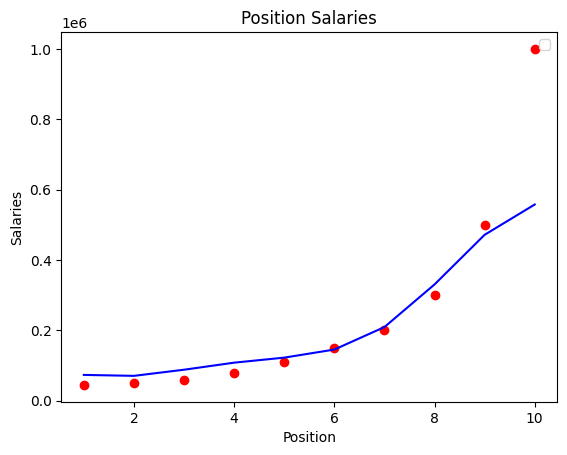

In [54]:
plt.scatter(scx.inverse_transform(x), scy.inverse_transform(y), color = 'red')
plt.plot(scx.inverse_transform(x),scy.inverse_transform(regressor.predict(x).reshape(-1, 1)), color = 'blue')
plt.title('Position Salaries')
plt.xlabel('Position')
plt.ylabel('Salaries')
plt.legend()
plt.show()

Visualizing the SVR results (for high resolution and smoother curve)

C:\Users\Hp\AppData\Local\Temp\ipykernel_3904\98081545.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid =  np.arange(min(scx.inverse_transform(x)), max(scx.inverse_transform(x)), 0.1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


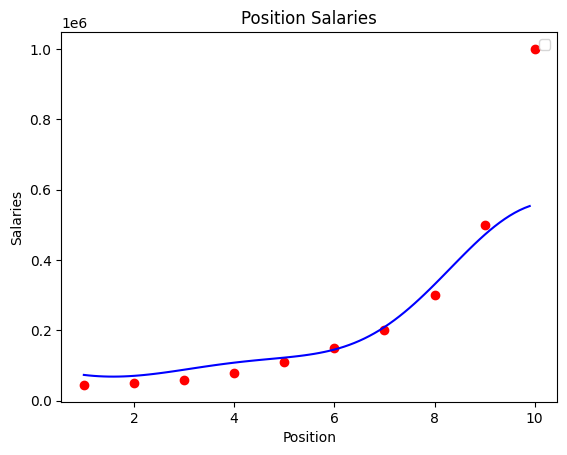

In [57]:
x_grid =  np.arange(min(scx.inverse_transform(x)), max(scx.inverse_transform(x)), 0.1)
x_grid =  x_grid.reshape(len(x_grid), 1)
plt.scatter(scx.inverse_transform(x), scy.inverse_transform(y), color = 'red')
plt.plot(x_grid, scy.inverse_transform(regressor.predict(scx.transform(x_grid)).reshape(-1, 1)), color = 'blue')
plt.title('Position Salaries')
plt.xlabel('Position')
plt.ylabel('Salaries')
plt.legend()
plt.show()